In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
# CPI by state and division (monthly)
df_cpi = pd.read_parquet("https://storage.dosm.gov.my/cpi/cpi_2d_state.parquet")
df_cpi["date"] = pd.to_datetime(df_cpi["date"])

print(f"CPI dataset shape: {df_cpi.shape}")
print(f"Date range: {df_cpi['date'].min()} to {df_cpi['date'].max()}")
print(f"States: {df_cpi['state'].nunique()}")
print(f"\nColumns: {df_cpi.columns.tolist()}")
df_cpi.head(10)

CPI dataset shape: (43008, 4)
Date range: 2010-01-01 00:00:00 to 2025-12-01 00:00:00
States: 16

Columns: ['state', 'date', 'division', 'index']


,state,date,division,index
0,Johor,2010-01-01,overall,99.4
1,Johor,2010-02-01,overall,99.4
2,Johor,2010-03-01,overall,99.4
3,Johor,2010-04-01,overall,99.4
4,Johor,2010-05-01,overall,99.6
5,Johor,2010-06-01,overall,99.8
6,Johor,2010-07-01,overall,100.1
7,Johor,2010-08-01,overall,100.3
8,Johor,2010-09-01,overall,100.3
9,Johor,2010-10-01,overall,100.5


In [3]:
# CPI inflation rates by state and division
df_inf = pd.read_parquet("https://storage.dosm.gov.my/cpi/cpi_2d_state_inflation.parquet")
df_inf["date"] = pd.to_datetime(df_inf["date"])

print(f"Inflation dataset shape: {df_inf.shape}")
print(f"\nColumns: {df_inf.columns.tolist()}")
df_inf.head(10)

Inflation dataset shape: (42784, 5)

Columns: ['state', 'date', 'division', 'inflation_yoy', 'inflation_mom']


,state,date,division,inflation_yoy,inflation_mom
0,Johor,2010-02-01,overall,NaN,0.0
1,Johor,2010-03-01,overall,NaN,0.0
2,Johor,2010-04-01,overall,NaN,0.0
3,Johor,2010-05-01,overall,NaN,0.2
4,Johor,2010-06-01,overall,NaN,0.2
5,Johor,2010-07-01,overall,NaN,0.3
6,Johor,2010-08-01,overall,NaN,0.2
7,Johor,2010-09-01,overall,NaN,0.0
8,Johor,2010-10-01,overall,NaN,0.2
9,Johor,2010-11-01,overall,NaN,0.3


In [7]:
# Pull the MCOICOP lookup table to decode division codes
df_lookup = pd.read_parquet("https://storage.dosm.gov.my/dictionaries/mcoicop.parquet")
print(f"Lookup shape: {df_lookup.shape}")
print(f"Columns: {df_lookup.columns.tolist()}")
df_lookup[df_lookup["digits"] == 2]

Lookup shape: (343, 7)
Columns: ['digits', 'division', 'group', 'class', 'subclass', 'desc_en', 'desc_bm']


,digits,division,group,class,subclass,desc_en,desc_bm
1,2,01,-,-,-,Food & Beverages,Makanan & Minuman
77,2,02,-,-,-,Alcoholic Beverages & Tobacco,Minuman Alkohol & Tembakau
88,2,03,-,-,-,Clothing & Footwear,Pakaian & Kasut
107,2,04,-,-,-,"Housing, Water, Electricity, Gas & Other Fuels","Perumahan, Air, Elektrik, Gas & Bahan Api Lain"
128,2,05,-,-,-,"Furnishings, Household Equipment & Routine Hou...","Hiasan, Perkakasan & Penyelenggaraan Isi Rumah"
166,2,06,-,-,-,Health,Kesihatan
192,2,07,-,-,-,Transport,Pengangkutan
231,2,08,-,-,-,Information & Communication,Maklumat & Komunikasi
250,2,09,-,-,-,"Recreation, Sport & Culture","Rekreasi, Sukan & Kebudayaan"
289,2,10,-,-,-,Education,Pendidikan


In [5]:
print("Unique divisions in CPI data:")
print(df_cpi["division"].unique())
print(f"\nTotal unique divisions: {df_cpi['division'].nunique()}")

Unique divisions in CPI data:
['overall' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12'
 '13']

Total unique divisions: 14


In [6]:
print("States in dataset:")
for s in sorted(df_cpi["state"].unique()):
    print(f"  - {s}")

States in dataset:
  - Johor
  - Kedah
  - Kelantan
  - Melaka
  - Negeri Sembilan
  - Pahang
  - Perak
  - Perlis
  - Pulau Pinang
  - Sabah
  - Sarawak
  - Selangor
  - Terengganu
  - W.P. Kuala Lumpur
  - W.P. Labuan
  - W.P. Putrajaya


In [8]:
# Create mapping from division code to English description
div_map = df_lookup[df_lookup["digits"] == 2].set_index("division")["desc_en"].to_dict()
div_map["overall"] = "Overall"
print("Division mapping:")
for k, v in div_map.items():
    print(f"  {k}: {v}")

Division mapping:
  01: Food & Beverages
  02: Alcoholic Beverages & Tobacco
  03: Clothing & Footwear
  04: Housing, Water, Electricity, Gas & Other Fuels
  05: Furnishings, Household Equipment & Routine Household Maintenance
  06: Health
  07: Transport
  08: Information & Communication
  09: Recreation, Sport & Culture
  10: Education
  11: Restaurant & Accommodation Services
  12: Insurance & Financial Services
  13: Personal Care, Social Protection & Miscellaneous Goods & Services
  overall: Overall


In [9]:
print("Unique divisions in CPI data:")
print(sorted(df_cpi["division"].unique()))
print(f"\nStates in dataset:")
for s in sorted(df_cpi["state"].unique()):
    print(f"  - {s}")

Unique divisions in CPI data:
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', 'overall']

States in dataset:
  - Johor
  - Kedah
  - Kelantan
  - Melaka
  - Negeri Sembilan
  - Pahang
  - Perak
  - Perlis
  - Pulau Pinang
  - Sabah
  - Sarawak
  - Selangor
  - Terengganu
  - W.P. Kuala Lumpur
  - W.P. Labuan
  - W.P. Putrajaya


In [10]:
# Filter for overall CPI, pick a few key states + Malaysia overall
# First, check if there's a "Malaysia" entry
print(df_cpi["state"].unique())

['Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang' 'Perak'
 'Perlis' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur' 'W.P. Labuan' 'W.P. Putrajaya']


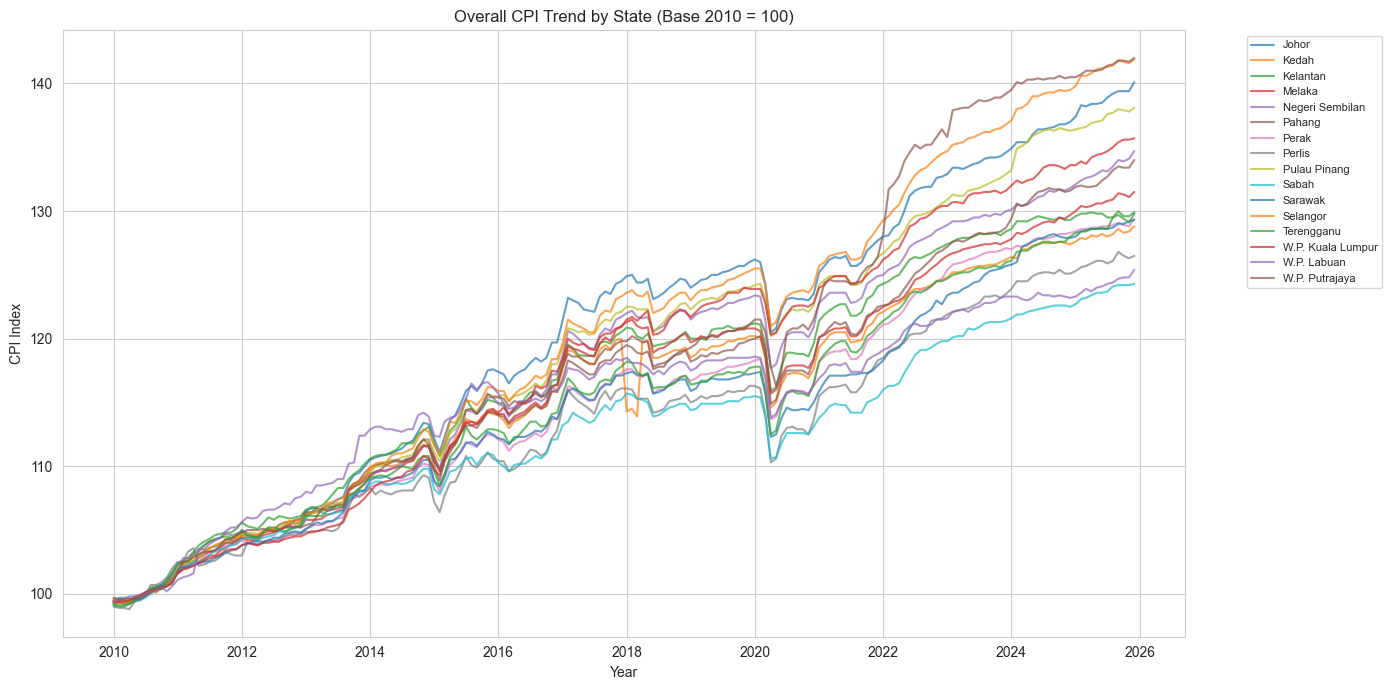

In [11]:
# Overall CPI trend for all states
df_overall = df_cpi[df_cpi["division"] == "overall"].copy()

fig, ax = plt.subplots(figsize=(14, 7))
for state in sorted(df_overall["state"].unique()):
    state_data = df_overall[df_overall["state"] == state]
    ax.plot(state_data["date"], state_data["index"], label=state, alpha=0.7)

ax.set_title("Overall CPI Trend by State (Base 2010 = 100)")
ax.set_xlabel("Year")
ax.set_ylabel("CPI Index")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.savefig("../outputs/cpi_trend_all_states.png", dpi=150, bbox_inches="tight")
plt.show()

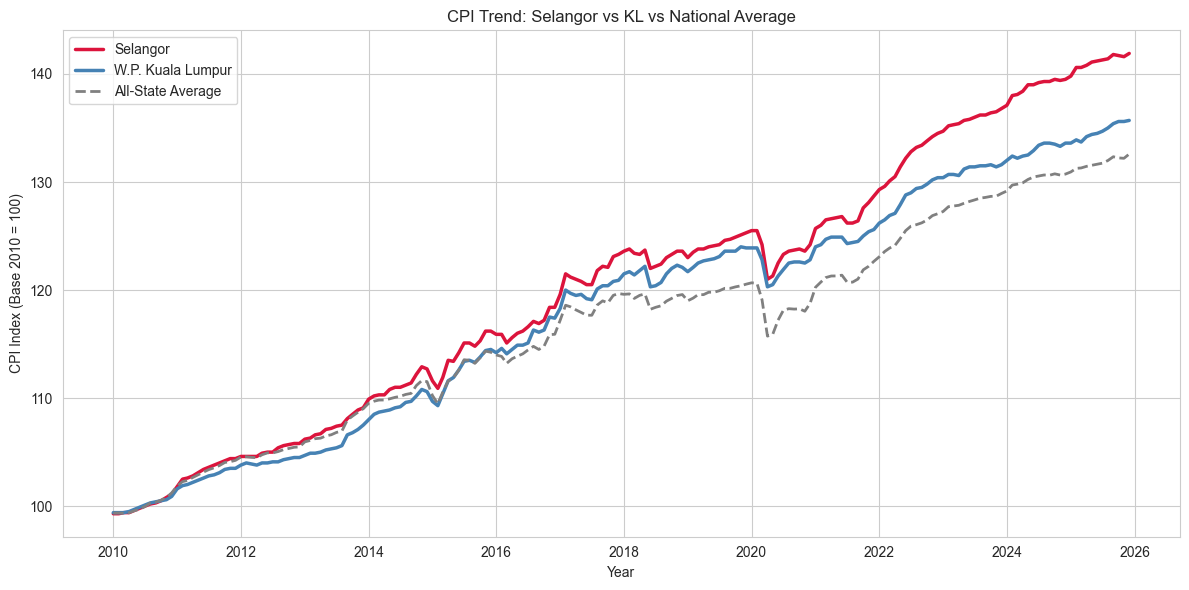

In [12]:
# Compare Selangor, KL, and the mean of all states
df_overall = df_cpi[df_cpi["division"] == "overall"].copy()

fig, ax = plt.subplots(figsize=(12, 6))

for state, color, lw in [("Selangor", "crimson", 2.5), ("W.P. Kuala Lumpur", "steelblue", 2.5)]:
    state_data = df_overall[df_overall["state"] == state]
    ax.plot(state_data["date"], state_data["index"], label=state, color=color, linewidth=lw)

# Average across all states
avg = df_overall.groupby("date")["index"].mean()
ax.plot(avg.index, avg.values, label="All-State Average", color="grey", linewidth=2, linestyle="--")

ax.set_title("CPI Trend: Selangor vs KL vs National Average")
ax.set_xlabel("Year")
ax.set_ylabel("CPI Index (Base 2010 = 100)")
ax.legend()
plt.tight_layout()
plt.savefig("../outputs/cpi_selangor_kl.png", dpi=150, bbox_inches="tight")
plt.show()

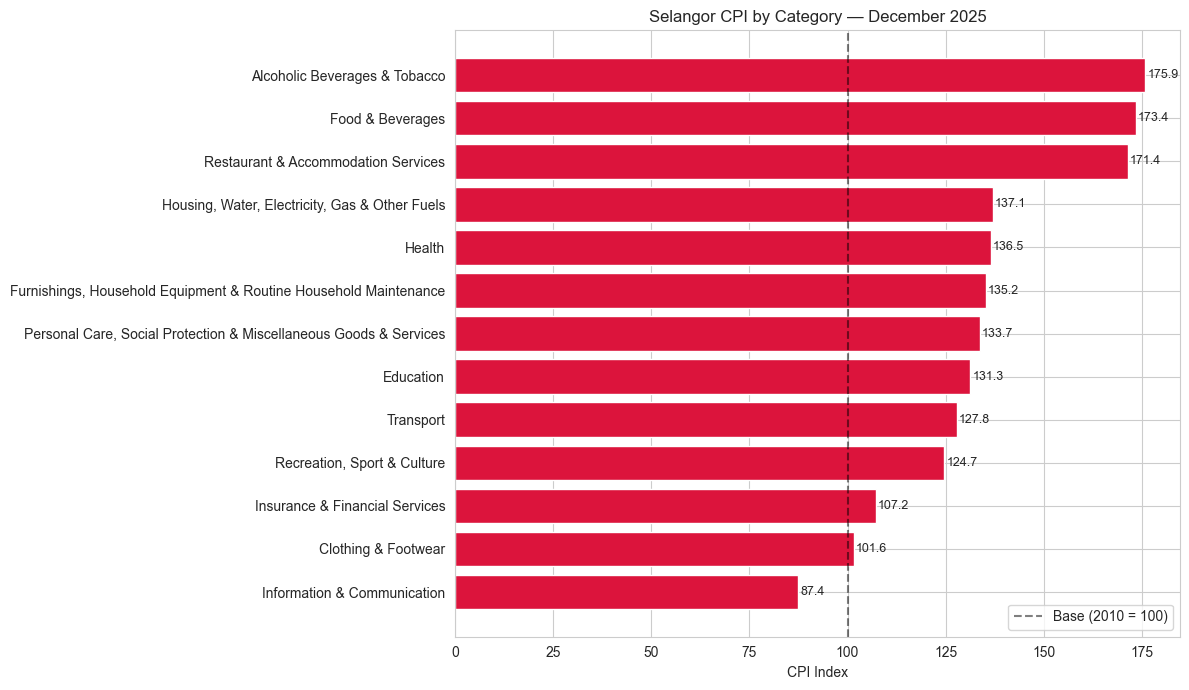

In [13]:
# Latest month's CPI by division for Selangor
df_sel = df_cpi[(df_cpi["state"] == "Selangor") & (df_cpi["division"] != "overall")].copy()
df_sel["category"] = df_sel["division"].map(div_map)
latest_date = df_sel["date"].max()
df_latest = df_sel[df_sel["date"] == latest_date].sort_values("index", ascending=True)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(df_latest["category"], df_latest["index"], color="crimson")
ax.axvline(x=100, color="black", linestyle="--", alpha=0.5, label="Base (2010 = 100)")
ax.set_xlabel("CPI Index")
ax.set_title(f"Selangor CPI by Category — {latest_date.strftime('%B %Y')}")

for bar, val in zip(bars, df_latest["index"]):
    ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, f"{val:.1f}", va="center", fontsize=9)

ax.legend()
plt.tight_layout()
plt.savefig("../outputs/selangor_cpi_categories.png", dpi=150, bbox_inches="tight")
plt.show()